In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


In [2]:
train=pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv.gz')
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
test=pd.read_csv('/kaggle/input/home-data-for-ml-course/test.csv')
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [4]:
train[(train['GrLivArea']>4000)&(train['SalePrice']<300000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [5]:
train=train.drop([523,1298])

In [6]:
alldata=pd.concat([train, test])
alldata

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [7]:
alldata['Old']=alldata['YrSold']-alldata['YearBuilt']
alldata['Overall']=alldata['OverallQual']+alldata['OverallCond']
alldata['TotalArea']=alldata['GrLivArea']+alldata['TotalBsmtSF']
# alldata['SubQual']=alldata['PoolQC']+alldata['Fence']+alldata['FireplaceQu']+alldata['HeatingQC']

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

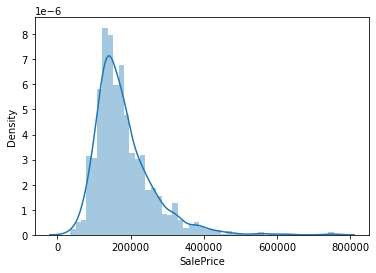

In [8]:
import seaborn as sns
sns.distplot(alldata['SalePrice'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

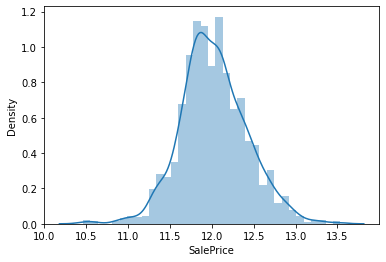

In [9]:
sns.distplot(np.log(alldata['SalePrice'])) #데이터 변환 

In [10]:
#상관관계 분석(중요칼럼 확인)
alldata.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
TotalArea        0.829042
OverallQual      0.795774
GrLivArea        0.734968
TotalBsmtSF      0.651153
GarageCars       0.641047
1stFlrSF         0.631530
GarageArea       0.629217
Overall          0.596672
FullBath         0.562165
TotRmsAbvGrd     0.537769
YearBuilt        0.523608
YearRemodAdd     0.507717
GarageYrBlt      0.487156
MasVnrArea       0.482719
Fireplaces       0.469862
BsmtFinSF1       0.409384
LotFrontage      0.370584
WoodDeckSF       0.324758
OpenPorchSF      0.321142
2ndFlrSF         0.320532
HalfBath         0.284590
LotArea          0.268179
BsmtFullBath     0.228459
BsmtUnfSF        0.214460
BedroomAbvGr     0.168245
ScreenPorch      0.111415
PoolArea         0.099490
MoSold           0.046124
3SsnPorch        0.044568
BsmtFinSF2      -0.011422
BsmtHalfBath    -0.016881
MiscVal         -0.021203
Id              -0.021673
LowQualFinSF    -0.025625
YrSold          -0.028882
OverallCond     -0.077948
MSSubClass      -0.084276
EnclosedPorc

In [11]:
alldata.corr()['OverallQual'].sort_values(ascending=False)

OverallQual      1.000000
SalePrice        0.795774
Overall          0.761645
TotalArea        0.666356
GarageCars       0.600778
YearBuilt        0.597151
GrLivArea        0.573413
GarageYrBlt      0.571360
YearRemodAdd     0.571132
GarageArea       0.562827
TotalBsmtSF      0.550018
FullBath         0.527329
1stFlrSF         0.475793
MasVnrArea       0.428950
Fireplaces       0.388595
TotRmsAbvGrd     0.386044
OpenPorchSF      0.292437
BsmtUnfSF        0.275449
BsmtFinSF1       0.274839
HalfBath         0.271181
WoodDeckSF       0.254300
2ndFlrSF         0.242621
LotFrontage      0.208813
BsmtFullBath     0.161368
LotArea          0.091652
BedroomAbvGr     0.072945
ScreenPorch      0.043570
MSSubClass       0.033599
MoSold           0.031017
3SsnPorch        0.018962
PoolArea         0.018690
MiscVal          0.005748
YrSold          -0.019242
Id              -0.028615
BsmtHalfBath    -0.040364
BsmtFinSF2      -0.042326
LowQualFinSF    -0.048328
OverallCond     -0.093137
EnclosedPorc

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

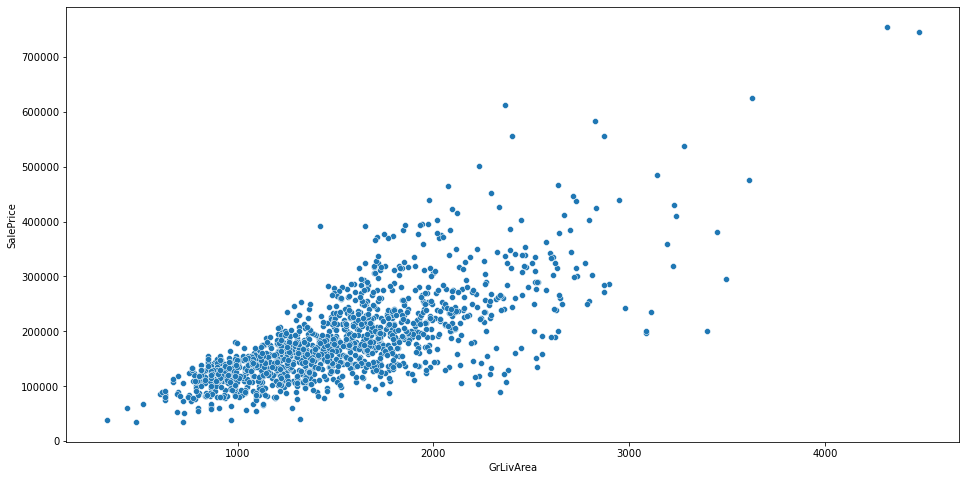

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
sns.scatterplot(alldata['GrLivArea'],alldata['SalePrice'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

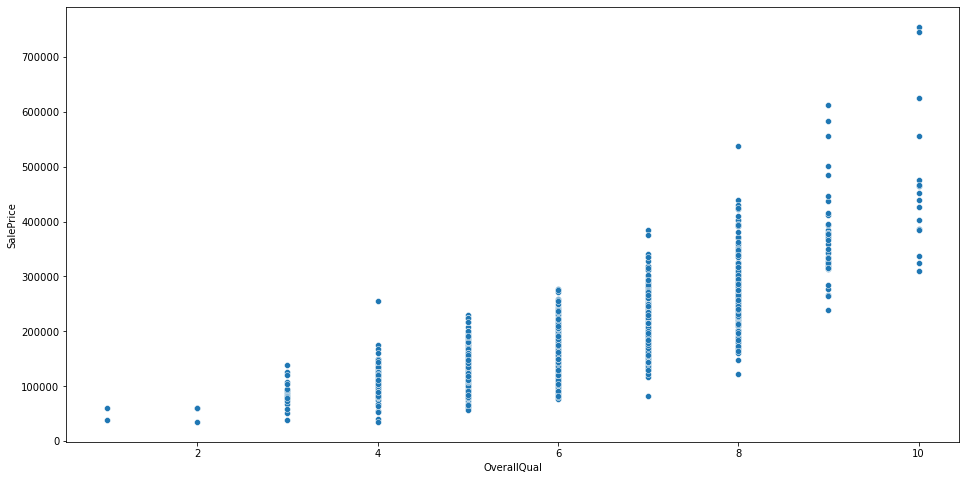

In [13]:
plt.figure(figsize=(16,8))
sns.scatterplot(alldata['OverallQual'],alldata['SalePrice'])

In [14]:
alldata2=alldata.drop(['Id','SalePrice'], axis=1)
alldata2

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Old,Overall,TotalArea
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,0,2,2008,WD,Normal,5,12,2566.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,0,5,2007,WD,Normal,31,14,2524.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,0,9,2008,WD,Normal,7,12,2706.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,0,2,2006,WD,Abnorml,91,12,2473.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,0,12,2008,WD,Normal,8,13,3343.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,0,6,2006,WD,Normal,36,11,1638.0
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,0,4,2006,WD,Abnorml,36,9,1638.0
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,0,9,2006,WD,Abnorml,46,12,2448.0
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,MnPrv,Shed,700,7,2006,WD,Normal,14,10,1882.0


In [15]:
alldata2['MSSubClass']=alldata2['MSSubClass'].astype(str)

In [16]:
alldata3=pd.get_dummies(alldata2) #OneHotEncoding 문자형 칼럼만 자동으로 바꿈
alldata3

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
4,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,...,0,0,0,1,0,0,0,0,1,0
1455,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,...,0,0,0,1,1,0,0,0,0,0
1456,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1457,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,0,0,0,1,0,0,0,0,1,0


In [17]:
alldata3=alldata3.fillna(-1)
alldata3

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
4,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,...,0,0,0,1,0,0,0,0,1,0
1455,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,...,0,0,0,1,1,0,0,0,0,0
1456,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1457,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,0,0,0,1,0,0,0,0,1,0


In [32]:
(alldata3['LotFrontage'] - alldata3['LotFrontage'].mean()) / alldata3['LotFrontage'].std()

0       0.224770
1       0.673581
2       0.314532
3       0.075166
4       0.793264
          ...   
1454   -1.091744
1455   -1.091744
1456    3.067243
1457    0.135008
1458    0.494057
Name: LotFrontage, Length: 2917, dtype: float64

In [18]:
from sklearn.preprocessing import StandardScaler #각 칼럼 값 범위 표준화 처리 라이브러리 설치
ss=StandardScaler()
alldata4=pd.DataFrame(ss.fit_transform(alldata3),columns=alldata3.columns)
alldata4

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.224808,-0.216437,0.649580,-0.507503,1.047231,0.897702,0.534118,0.601514,-0.293132,-0.933760,...,-0.052441,-0.297377,-0.049046,0.394015,-0.263958,-0.064271,-0.091082,-0.126579,0.463039,-0.301455
1,0.673697,-0.069108,-0.061424,2.187374,0.155606,-0.394865,-0.566966,1.213983,-0.293132,-0.628954,...,-0.052441,-0.297377,-0.049046,0.394015,-0.263958,-0.064271,-0.091082,-0.126579,0.463039,-0.301455
2,0.314586,0.142276,0.649580,-0.507503,0.981185,0.849829,0.343114,0.106136,-0.293132,-0.287753,...,-0.052441,-0.297377,-0.049046,0.394015,-0.263958,-0.064271,-0.091082,-0.126579,0.463039,-0.301455
3,0.075179,-0.075514,0.649580,-0.507503,-1.858805,-0.682102,-0.566966,-0.501829,-0.293132,-0.046638,...,-0.052441,-0.297377,-0.049046,0.394015,3.788487,-0.064271,-0.091082,-0.126579,-2.159648,-0.301455
4,0.793400,0.527891,1.360583,-0.507503,0.948161,0.754083,1.399255,0.486677,-0.293132,-0.160372,...,-0.052441,-0.297377,-0.049046,0.394015,-0.263958,-0.064271,-0.091082,-0.126579,0.463039,-0.301455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,-1.091931,-1.050955,-1.483430,1.289082,-0.042533,-0.682102,-0.566966,-0.988201,-0.293132,-0.032990,...,-0.052441,-0.297377,-0.049046,0.394015,-0.263958,-0.064271,-0.091082,-0.126579,0.463039,-0.301455
2913,-1.091931,-1.056336,-1.483430,-0.507503,-0.042533,-0.682102,-0.566966,-0.420767,-0.293132,-0.606207,...,-0.052441,-0.297377,-0.049046,0.394015,3.788487,-0.064271,-0.091082,-0.126579,-2.159648,-0.301455
2914,3.067768,1.263252,-0.772427,1.289082,-0.372764,0.562592,-0.566966,1.767906,-0.293132,-1.274961,...,-0.052441,-0.297377,-0.049046,0.394015,3.788487,-0.064271,-0.091082,-0.126579,-2.159648,-0.301455
2915,0.135031,0.038633,-0.772427,-0.507503,0.683976,0.371101,-0.566966,-0.229371,-0.293132,0.032975,...,-0.052441,-0.297377,-0.049046,0.394015,-0.263958,-0.064271,-0.091082,-0.126579,0.463039,-0.301455


In [19]:
train2=alldata4[:len(train)]
test2=alldata4[len(train):]

In [20]:
from sklearn.linear_model import Ridge #선형회귀 라이브러리 설치
rd=Ridge(alpha=200)
rd.fit(train2, np.log(train['SalePrice'])) #데이터 변환을 이용한 스케일링 작업
result=rd.predict(test2)

In [21]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(rd,train2,train['SalePrice'],n_jobs=-1,cv=10,scoring='neg_mean_squared_error') #cv(폴드값)
np.sqrt(-cvs.mean())

25359.704054467536

In [22]:
for i in [10,50,100,200,300,400,500,700,1000]:
    rd_cv=Ridge(alpha=i)
    cvs=cross_val_score(rd_cv,train2,train['SalePrice'],n_jobs=-1,cv=10,scoring='neg_mean_squared_error') #cv(폴드값)
    print(i,np.sqrt(-cvs.mean()))

10 26583.90370295347
50 25962.957897001983
100 25643.41224389562
200 25359.704054467536
300 25261.108560371285
400 25252.39488627111
500 25297.70136608124
700 25484.78161845682
1000 25894.367019417456


In [23]:
sub=pd.read_csv('/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz')
sub

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [24]:
sub['SalePrice']=np.exp(result)
sub

,Id,SalePrice
0,1461,120308.475779
1,1462,161372.387785
2,1463,181202.788840
3,1464,198984.002022
4,1465,196386.735441
...,...,...
1454,2915,83566.349412
1455,2916,83463.223090
1456,2917,165680.427889
1457,2918,113661.034171


In [25]:
sub.to_csv('sub.csv',index=False)